# APPLIED DATA SCIENCE CAPSTONE BY IBM/COURSERA

## Capstone Project - The Battle of the Neighborhoods (Week 2)
## By Mercy AKERELE

## INTRODUCTION

In this project, I will try to compare New York (United State of America) and Hong Kong. I will explore the similarity and dissimilarity features of both cities in terms of the amenities there, the population, and the class of people resident therein. Below is a short introduction to each of the selected cities:

New York is the most populous city in the United States, having an estimated 2019 population of about 8.5 million distributed over about 302.6 square miles (784 km2), New York is also the most densely populated major city in the United States, the largest metropolitan area in the world by urban landmass. It is one of the world's most populous megacities and has been described as the cultural, financial, and media capital of the world, significantly influencing commerce, entertainment, research, technology, education, politics, tourism, art, fashion, and sports. New York is known for clusters of skyscrapers in New York city, and one of the world's most famous waterfalls. Travelers have many options while visiting the state, such as sipping wine at a vineyard or watching a Broadway plays. New York City is split up into five boroughs and 59 community districts: the Bronx (12 districts), Brooklyn (18 districts), Manhattan (12 districts), Queens (14 districts), and Staten Island (3 districts). Each borough has the same boundaries as a county of the state. 

Hong Kong is also known as the special administrative region of the people’s republic of china. It is a metropolitan area with over 7.5 million people of various nationalities. It is one of the world's most significant financial centers and commercial ports, as well as the world's tenth-largest exporter and ninth-largest importer. The city is well developed with the largest number of skyscrapers of any city in the world. It is made up of 18 districts. The population of the district ranges from 137,122 to 607,544, with typical area of 10 km2 to 220 km2.  The District Administration Scheme was implemented in 1982 with the establishment of a district board and a district management committee in each of the districts in Hong Kong.


The main objectives of the project are:

•	To explore the city features and suggest to tourists which city is more fun to visit for tourist purpose

•	For businessmen looking to establish a restaurant business, we will recommend which area in which city is best for their business.

## DATA

The information about New York districts was obtained from (https://en.wikipedia.org/wiki/Neighborhoods_in_New_York_City#:~:text=New%20York%20City%20is%20split,%2C%20Queens%2C%20and%20Staten%20Island), while that of Hong Kong was obtained from (https://en.wikipedia.org/wiki/Districts_of_Hong_Kong). Both extracted information are converted to a .csv file for easy manipulation, and are added to my GitHub for reference purpose:
https://github.com/wolebode/Coursera_Capstone/blob/master/nyc_community.csv
https://github.com/wolebode/Coursera_Capstone/blob/master/hk_community.csv

In the project, I will explore:

•	the segment areas of New York and Hong Kong based on the most common places using Foursquare and machine learning segmentation and clustering.

•	the number of existing restaurants in the neighborhood and their distance to the city center. This will be done using a regularly spaced grid of locations centered around the city center

## METHOD

First, I need read the data for both New York and Hong Kong into the dataframe.

Using the basic methodology as taught in Week 3 lab, I will:

. Obtain the equivalent latitude and longitude values for both cities using Foursquare API. This will also be used to explore neighborhoods in both cities.

I will also explore function to get the most common venue categories in each neighborhood, and then use this feature to group the neighborhoods into clusters. K-means clustering algorithm will be use to complete this task. 

The Folium library will be used to visualize the neighborhoods in New York and Hong Kong cities, and their corresponding clusters. 


In [24]:
#import the required library
import numpy as np
import pandas as pd
import csv

#read csv file containing the New York district data
df_ny = pd.read_csv(r'nyc_community1.csv', encoding='mac_roman')
df_ny.head()

,Community Board (CB),Area (km2),Population Census 2010,Pop./km2,Neighborhoods
0,Bronx,7.17,"91,497","12,761","Melrose,†Mott Haven,†Port Morris"
1,Bronx,5.54,"52,246","9,792","Hunts Point,†Longwood"
2,Bronx,4.07,"79,762","19,598","Claremont,†Concourse Village,†Crotona Park,†Mo..."
3,Bronx,5.28,"146,441","27,735","Concourse,†Highbridge"
4,Bronx,3.55,"128,200","36,145","Fordham,†Morris Heights,†Mount Hope,†Universit..."


In [25]:
#examine data
print('New York city has {} district and {} areas.'.format(
        len(df_ny['Community Board (CB)'].unique()),
        df_ny.shape[0]
    )
)

#grouping data to find District with highest number of area
df_ny.groupby('Community Board (CB)').count()

New York city has 10 district and 59 areas.


,Area (km2),Population Census 2010,Pop./km2,Neighborhoods
Community Board (CB),,,,
Bronx,11,11,11,11
Bronx†,1,1,1,1
Brooklyn,13,13,13,13
Brooklyn†,5,5,5,5
Manhattan,9,9,9,9
Manhattan†,3,3,3,3
Queens,7,7,7,7
Queens†,7,7,7,7
Staten Island,2,2,2,2


In [26]:
#read and load the Hong Kong data
df_hk = pd.read_csv(r'hk_community1.csv')
df_hk.head()

,District,Population,Area (km2),Density (/km2),Region
0,Central and Western,"244,600",12.44,"19,983.92",Hong Kong Island
1,Eastern,"574,500",18.56,"31,217.67",Hong Kong Island
2,Southern,"269,200",38.85,"6,962.68",Hong Kong Island
3,Wan Chai,"150,900",9.83,"15,300.10",Hong Kong Island
4,Sham Shui Po,"390,600",9.35,"41,529.41",Kowloon


In [27]:
#examine data
print('Hong Kong has {} districts and {} areas.'.format(
        len(df_hk['Region'].unique()),
        df_ny.shape[0]
    )
)

#grouping data to find District with highest number of area
df_hk.groupby('Region').count()

Hong Kong has 3 districts and 59 areas.


,District,Population,Area (km2),Density (/km2)
Region,,,,
Hong Kong Island,4,4,4,4
Kowloon,5,5,5,5
New Territories,9,9,9,9


In [85]:
CLIENT_ID = 'IWELBOPJMXCZ3KUTICZWXGCD1SYX4W1VN4LC1UZDBVHOKZIL' # my Foursquare ID
CLIENT_SECRET = '11JFED0DO52GGFAICOO5PKMXELC0VO25QKR2RJHLGN0N0BZE' # my Foursquare Secret
VERSION = '20180604'
# LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: IWELBOPJMXCZ3KUTICZWXGCD1SYX4W1VN4LC1UZDBVHOKZIL
CLIENT_SECRET:11JFED0DO52GGFAICOO5PKMXELC0VO25QKR2RJHLGN0N0BZE


In [37]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.

Folium installed
Libraries imported.


In [99]:
address = 'New York, NY'

geolocator = Nominatim(user_agent="New_York_city")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)


40.7127281 -74.0060152


In [100]:
search_query = 'Community Board'
print(search_query + ' .... OK!')


Community Board .... OK!


In [101]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query)
url


'https://api.foursquare.com/v2/venues/search?client_id=IWELBOPJMXCZ3KUTICZWXGCD1SYX4W1VN4LC1UZDBVHOKZIL&client_secret=11JFED0DO52GGFAICOO5PKMXELC0VO25QKR2RJHLGN0N0BZE&ll=40.7127281,-74.0060152&v=20180604&query=Community Board'

In [102]:
results = requests.get(url).json()
results


{'meta': {'code': 200, 'requestId': '5f08dd75f1677070ae60658f'},
 'response': {'venues': [{'id': '4edd062d29c2b9122b88986c',
    'name': 'Manhattan Community Board 1',
    'location': {'address': '1 Centre St Rm 2202 North',
     'lat': 40.713205,
     'lng': -74.003372,
     'labeledLatLngs': [{'label': 'display',
       'lat': 40.713205,
       'lng': -74.003372}],
     'distance': 229,
     'postalCode': '10007',
     'cc': 'US',
     'city': 'New York',
     'state': 'NY',
     'country': 'United States',
     'formattedAddress': ['1 Centre St Rm 2202 North',
      'New York, NY 10007',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d126941735',
      'name': 'Government Building',
      'pluralName': 'Government Buildings',
      'shortName': 'Government',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/government_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1594416533',
    'hasPerk': False},
   {'id': '4e

In [103]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe, and keep only the applicable values
ny_dataframe = json_normalize(venues)
ny_dataframe.head()

ny_filtered_columns = ['name', 'categories'] + [col for col in ny_dataframe.columns if col.startswith('location.')] + ['id']
ny_dataframe_filtered = ny_dataframe.loc[:, ny_filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
ny_dataframe_filtered['categories'] = ny_dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
ny_dataframe_filtered.columns = [column.split('.')[-1] for column in ny_dataframe_filtered.columns]

print('{} venues were returned by Foursquare for New York.'.format(ny_dataframe_filtered.shape[0]))
ny_dataframe_filtered.head()


30 venues were returned by Foursquare for New York.


C:\Users\mercy\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """


,name,categories,address,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,crossStreet,id
0,Manhattan Community Board 1,Government Building,1 Centre St Rm 2202 North,40.713205,-74.003372,"[{'label': 'display', 'lat': 40.713205, 'lng':...",229,10007,US,New York,NY,United States,"[1 Centre St Rm 2202 North, New York, NY 10007...",NaN,4edd062d29c2b9122b88986c
1,Community Board 3,Event Space,NaN,40.722027,-73.986145,"[{'label': 'display', 'lat': 40.72202671897170...",1970,NaN,US,NaN,New York,United States,"[New York, United States]",NaN,4e0a5b4cc65b62ba40db0b4f
2,Community Board 3 Office,Government Building,59 E 4th St,40.726975,-73.990761,"[{'label': 'display', 'lat': 40.726975, 'lng':...",2042,10003,US,New York,NY,United States,"[59 E 4th St (btwn Bowery and 2nd Ave), New Yo...",btwn Bowery and 2nd Ave,4e94cf91823129fb51f93302
3,Manhattan Community Board 2,Government Building,3 Washington Square Vlg,40.727783,-73.997810,"[{'label': 'display', 'lat': 40.727783203125, ...",1813,10012,US,New York,NY,United States,"[3 Washington Square Vlg (LaGuardia Place), Ne...",LaGuardia Place,4c630a9e79d1e21ede9cd715
4,Community Board 5,None,NaN,40.737311,-73.993003,"[{'label': 'display', 'lat': 40.73731075471266...",2948,10011,US,New York,NY,United States,"[New York, NY 10011, United States]",NaN,4cb77fadc7228cfa7d5400ce


In [104]:
address = 'Hong Kong'

geolocator = Nominatim(user_agent="Hong Kong")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

22.2793278 114.1628131


In [105]:
search_query = 'District'
print(search_query + ' .... OK!')

District .... OK!


In [107]:
url2 = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query)
url2

'https://api.foursquare.com/v2/venues/search?client_id=IWELBOPJMXCZ3KUTICZWXGCD1SYX4W1VN4LC1UZDBVHOKZIL&client_secret=11JFED0DO52GGFAICOO5PKMXELC0VO25QKR2RJHLGN0N0BZE&ll=22.2793278,114.1628131&v=20180604&query=District'

In [108]:
results2 = requests.get(url2).json()
results2

{'meta': {'code': 200, 'requestId': '5f08dc300ab6c4151b290760'},
 'response': {'venues': [{'id': '4b0588d2f964a5208ddb22e3',
    'name': 'SoHo District (蘇豪區)',
    'location': {'lat': 22.281881038398794,
     'lng': 114.15276322761213,
     'labeledLatLngs': [{'label': 'display',
       'lat': 22.281881038398794,
       'lng': 114.15276322761213}],
     'distance': 1073,
     'cc': 'HK',
     'city': '中環',
     'state': '中西區',
     'country': '香港',
     'formattedAddress': ['中西區', '香港']},
    'categories': [{'id': '4f2a25ac4b909258e854f55f',
      'name': 'Neighborhood',
      'pluralName': 'Neighborhoods',
      'shortName': 'Neighborhood',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/neighborhood_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1594416592',
    'hasPerk': False},
   {'id': '534ac609498e9a05af8627cb',
    'name': 'Central and Western District Promenade (Central Section) (中西區海濱長廊（中環段）)',
    'location': {'add

In [114]:
# assign relevant part of JSON to venues
venues2 = results2['response']['venues']

# tranform venues into a dataframe, and keep only the applicable values
hk_dataframe = json_normalize(venues2)
hk_dataframe.head()

filtered_columns = ['name', 'categories'] + [col for col in hk_dataframe.columns if col.startswith('location.')] + ['id']
hk_dataframe_filtered = hk_dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
hk_dataframe_filtered['categories'] = hk_dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
hk_dataframe_filtered.columns = [column.split('.')[-1] for column in hk_dataframe_filtered.columns]

print('{} venues were returned by Foursquare for Hong Kong.'.format(hk_dataframe_filtered.shape[0]))
hk_dataframe_filtered

30 venues were returned by Foursquare for Hong Kong.


C:\Users\mercy\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """


,name,categories,lat,lng,labeledLatLngs,distance,cc,city,state,country,formattedAddress,address,neighborhood,crossStreet,id
0,SoHo District (蘇豪區),Neighborhood,22.281881,114.152763,"[{'label': 'display', 'lat': 22.28188103839879...",1073,HK,中環,中西區,香港,"[中西區, 香港]",NaN,NaN,NaN,4b0588d2f964a5208ddb22e3
1,Central and Western District Promenade (Centra...,Waterfront,22.283358,114.165416,"[{'label': 'display', 'lat': 22.28335838053919...",522,HK,中西区,NaN,香港,"[Lung Wo Rd., 香港]",Lung Wo Rd.,NaN,NaN,534ac609498e9a05af8627cb
2,District Court (區域法院),Courthouse,22.279922,114.172381,"[{'label': 'display', 'lat': 22.27992236865738...",987,HK,灣仔,NaN,香港,"[Wanchai Tower, 12 Harbour Rd, 香港]","Wanchai Tower, 12 Harbour Rd",NaN,NaN,4c19954dd4d9c928404df129
3,West Kowloon Cultural District (西九文化區),Event Space,22.300591,114.154873,"[{'label': 'display', 'lat': 22.3005909, 'lng'...",2504,HK,West Kowloon,NaN,香港,"[Austin Rd W, 香港]",Austin Rd W,West Kowloon,NaN,4e88789e775b443a6a89709b
4,Wan Chai District Office Public Enquiry Servic...,Government Building,22.277028,114.173414,"[{'label': 'display', 'lat': 22.27702796380886...",1121,HK,灣仔,灣仔區,香港,"[2 O'Brien Rd, 灣仔區, 香港]",2 O'Brien Rd,NaN,NaN,4eae387bf7906795c405edde
5,Western District Public Cargo Working Area (西環...,Pier,22.286088,114.130654,"[{'label': 'display', 'lat': 22.28608783469992...",3396,HK,Shek Tong Tsui,NaN,香港,"[Shing Sai Rd, 香港]",Shing Sai Rd,NaN,NaN,4f657c27e4b04d4b16982c73
6,Central District Health Centre 中區健康院,Medical Center,22.284449,114.152675,"[{'label': 'display', 'lat': 22.284449, 'lng':...",1189,HK,中環,中西區,香港,"[1 Kau U Fong, 中西區, 香港]",1 Kau U Fong,NaN,NaN,4d929fef14228cfa22eb507b
7,Central and Western District Promenade (Sheung...,Plaza,22.288748,114.150307,"[{'label': 'display', 'lat': 22.28874755987837...",1660,HK,Sheung Wan,NaN,香港,"[Chung Kong Rd, 香港]",Chung Kong Rd,NaN,NaN,4c9cb59b9975a143c28534cf
8,Central and Western District Promenade (Wester...,Waterfront,22.289472,114.136016,"[{'label': 'display', 'lat': 22.289472, 'lng':...",2982,HK,NaN,NaN,香港,[香港],NaN,Sai Wan,NaN,5ae6ed051ffed7002c0945fa
9,C & W District St. Anthony’s School (中西區聖安多尼學校),Elementary School,22.283357,114.147303,"[{'label': 'display', 'lat': 22.283357, 'lng':...",1659,HK,香港,NaN,香港,"[2 Hospital Rd, 香港]",2 Hospital Rd,NaN,NaN,5a5d8c000881585c235fa87e


In [68]:
#slice the original dataframe and create a new dataframe
new_ny_df = ny_dataframe_filtered[ny_dataframe_filtered['name'] == 'new York'].reset_index(drop=True)

#get the geographical coordinates of new york
address = 'New York'
geolocator = Nominatim(user_agent="https://courseracapstoneproject.com")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

# create map of Bukit Bintang using latitude and longitude values
map_ny = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(new_ny_df['lat'], new_ny_df['lng'], new_ny_df['city']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_ny)  
    
map_ny

In [69]:
#slice the original dataframe and create a new dataframe
new_hk_df = hk_dataframe_filtered[hk_dataframe_filtered['name'] == 'Hong Kong'].reset_index(drop=True)

#get the geographical coordinates of Bukit Bintang, Kuala Lumpur
address = 'Hong Kong'
geolocator = Nominatim(user_agent="https://courseracapstoneproject.com")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

# create map of Bukit Bintang using latitude and longitude values
map_hk = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(new_hk_df['lat'], new_hk_df['lng'], new_hk_df['neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_hk)  
    
map_hk

In [138]:
#function to repeat the same process to all area
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    ny_dataframe_filtered = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    ny_dataframe_filtered.columns = ['name', 
                  'name Latitude', 
                  'name Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(ny_dataframe_filtered)

#run the above function on each neighborhood and create a new dataframe
ny_venues = getNearbyVenues(names=ny_dataframe_filtered['name'],
                                   latitudes=ny_dataframe_filtered['lat'],
                                   longitudes=ny_dataframe_filtered['lng']
                                  )

#check the size of the resulting dataframe
print(ny_venues.shape)
ny_venues.head()

Manhattan Community Board 1
Community Board 3
Community Board 3 Office
Manhattan Community Board 2
Community Board 5
community board 6
Community Board No.1
Community Board 5
Community Board 5
Community Board 7 - Brooklyn
Community Board 5 Office
Community Board 3
Community board 4-Manhattan
Community Board 7
Community Board 1
Community Board 8 Manhattan
Community Board 6 Office
Community Board 7
Community Board 1 - Staten Island
Brooklyn Community Board 8
Community Board 10
Community Board 18
Community Board 11
Manhattan Community Board 4
Community Board 9
Community Board 2
Community Board 12
Community Board One
Community board 1 full board meeting
Community Board 15
(733, 7)


,name,name Latitude,name Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Manhattan Community Board 1,40.713205,-74.003372,Gibney Dance Center Downtown,40.713923,-74.005661,Dance Studio
1,Manhattan Community Board 1,40.713205,-74.003372,Foley Square,40.714509,-74.002919,Park
2,Manhattan Community Board 1,40.713205,-74.003372,City Hall Park,40.712415,-74.006724,Park
3,Manhattan Community Board 1,40.713205,-74.003372,African Burial Ground National Monument,40.714990,-74.005530,Monument / Landmark
4,Manhattan Community Board 1,40.713205,-74.003372,CrossFit 212 TriBeCa,40.714537,-74.005999,Gym


In [140]:
#check how many venues were returned for each area
print('There are {} uniques categories in New York.'.format(len(ny_venues['Venue Category'].unique())))
ny_venues.groupby('name').count()

There are 194 uniques categories in New York.


,name Latitude,name Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
name,,,,,,
Brooklyn Community Board 8,14,14,14,14,14,14
Community Board 1,30,30,30,30,30,30
Community Board 1 - Staten Island,9,9,9,9,9,9
Community Board 10,30,30,30,30,30,30
Community Board 11,30,30,30,30,30,30
Community Board 12,30,30,30,30,30,30
Community Board 15,12,12,12,12,12,12
Community Board 18,4,4,4,4,4,4
Community Board 2,30,30,30,30,30,30


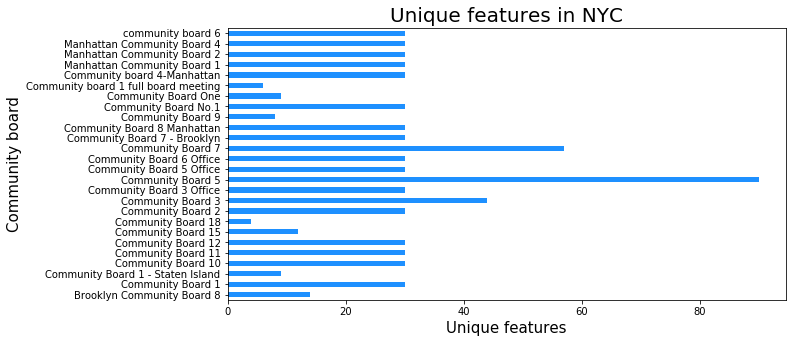

In [164]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline
import seaborn as sns

clr = "dodgerblue"
ny_venues.groupby('name')['Venue Category'].count().plot.barh(figsize=(10,5), color=clr)
plt.title('Unique features in NYC', fontsize = 20)
plt.xlabel('Unique features', fontsize = 15)
plt.ylabel('Community board',fontsize = 15)
plt.xticks(rotation = 'horizontal')
plt.show()

In [143]:
# one hot encoding
ny_onehot = pd.get_dummies(ny_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
ny_onehot['name'] = ny_venues['name'] 

# move neighborhood column to the first column
fixed_columns = [ny_onehot.columns[-1]] + list(ny_onehot.columns[:-1])
ny_onehot = ny_onehot[fixed_columns]

#examine the new dataframe size after one hot encoding
print('{} rows were returned after one hot encoding.'.format(ny_onehot.shape[0]))

#group rows by neighborhood and by taking the mean of the frequency of occurrence of each category
ny_grouped = ny_onehot.groupby('name').mean().reset_index()

#examine the new dataframe size after one hot encoding
print('{} rows were returned after grouping.'.format(ny_grouped.shape[0]))

733 rows were returned after one hot encoding.
26 rows were returned after grouping.


In [144]:
#print each neighborhood along with the top 5 most common venues
num_top_venues = 5

for hood in ny_grouped['name']:
    print("----"+hood+"----")
    temp = ny_grouped[ny_grouped['name'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Brooklyn Community Board 8----
                           venue  freq
0             Chinese Restaurant  0.14
1                 Discount Store  0.07
2  Vegetarian / Vegan Restaurant  0.07
3                           Café  0.07
4                   Cocktail Bar  0.07


----Community Board 1----
                venue  freq
0         Coffee Shop  0.10
1  Italian Restaurant  0.07
2          Restaurant  0.07
3                 Bar  0.07
4        Cocktail Bar  0.07


----Community Board 1 - Staten Island----
                         venue  freq
0             Storage Facility  0.11
1           Mexican Restaurant  0.11
2                  Pizza Place  0.11
3                   Taco Place  0.11
4  Eastern European Restaurant  0.11


----Community Board 10----
                             venue  freq
0  Southern / Soul Food Restaurant  0.10
1                      Pizza Place  0.07
2                 Sushi Restaurant  0.07
3                     Cocktail Bar  0.07
4              Arts & Crafts Store 

In [156]:
#put into a pandas dataframe

#write a function to sort the venues in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

#create the new dataframe and display the top 10 venues for each neighborhood
num_top_venues = 8

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['name']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
ny_areas_venues_sorted = pd.DataFrame(columns=columns)
ny_areas_venues_sorted['name'] = ny_grouped['name']

for ind in np.arange(ny_grouped.shape[0]):
    ny_areas_venues_sorted.iloc[ind, 1:] = return_most_common_venues(ny_grouped.iloc[ind, :], num_top_venues)

ny_areas_venues_sorted.head()

,name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue
0,Brooklyn Community Board 8,Chinese Restaurant,History Museum,Cocktail Bar,Bus Stop,Lounge,Liquor Store,Café,Seafood Restaurant
1,Community Board 1,Coffee Shop,Bar,Butcher,Cocktail Bar,Italian Restaurant,Restaurant,Tea Room,Martial Arts Dojo
2,Community Board 1 - Staten Island,Pizza Place,Mexican Restaurant,Burger Joint,Storage Facility,Grocery Store,Taco Place,Eastern European Restaurant,Bakery
3,Community Board 10,Southern / Soul Food Restaurant,Pizza Place,Cocktail Bar,Arts & Crafts Store,Sushi Restaurant,Yoga Studio,Sporting Goods Shop,Spanish Restaurant
4,Community Board 11,Donut Shop,Pizza Place,Fast Food Restaurant,Italian Restaurant,Coffee Shop,Bagel Shop,Park,Middle Eastern Restaurant
5,Community Board 12,Coffee Shop,Dog Run,Spanish Restaurant,Sandwich Place,Italian Restaurant,Bookstore,Spa,Latin American Restaurant
6,Community Board 15,Café,Sandwich Place,Pizza Place,High School,Harbor / Marina,Dance Studio,College Academic Building,Bus Stop
7,Community Board 18,Harbor / Marina,Gym,Athletics & Sports,Yoga Studio,Drugstore,Film Studio,Fast Food Restaurant,Farmers Market
8,Community Board 2,Fast Food Restaurant,Mobile Phone Shop,Discount Store,Pharmacy,Sandwich Place,Donut Shop,Grocery Store,Bank
9,Community Board 3,Italian Restaurant,Grocery Store,Discount Store,Sandwich Place,Bakery,Boutique,Bus Station,Deli / Bodega


In [151]:
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 3

ny_grouped_clustering = ny_grouped.drop('name', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(ny_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]


array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [175]:
#create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.
#new_ny_df=new_ny_df.set_index(ny_merged.index)
ny_merged =new_ny_df

# add clustering labels
ny_merged['Cluster Labels'] = kmeans.labels_

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
ny_merged = ny_merged.join(ny_areas_venues_sorted.set_index('name'), on='name')

ny_merged

,name,categories,address,lat,lng,labeledLatLngs,distance,postalCode,cc,city,...,id,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [150]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

#Finally, let's visualize the resulting clusters
# create map 3.1343385, 101.6863371
ny_clusters = folium.Map(location=[3.1343385, 101.6863371], zoom_start=13)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(ny_merged['lat'], ny_merged['lng'], ny_merged['name'], ny_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(ny_clusters)
       
ny_clusters

ValueError: Location values cannot contain NaNs, got:
[nan, nan]

## Now I want to process the datasets for Hong Kong district

In [165]:
#function to repeat the same process to all area
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    hk_dataframe_filtered = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    hk_dataframe_filtered.columns = ['name', 
                  'name Latitude', 
                  'name Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(hk_dataframe_filtered)

#run the above function on each neighborhood and create a new dataframe
hk_venues = getNearbyVenues(names=hk_dataframe_filtered['name'],
                                   latitudes=hk_dataframe_filtered['lat'],
                                   longitudes=hk_dataframe_filtered['lng']
                                  )

#check the size of the resulting dataframe
print(hk_venues.shape)
hk_venues.head()

SoHo District (蘇豪區)
Central and Western District Promenade (Central Section) (中西區海濱長廊（中環段）)
District Court (區域法院)
West Kowloon Cultural District (西九文化區)
Wan Chai District Office Public Enquiry Service Centre (灣仔民政事務處諮詢服務中心)
Western District Public Cargo Working Area (西環公眾貨物裝卸區)
Central District Health Centre 中區健康院
Central and Western District Promenade (Sheung Wan Section) (中西區海濱長廊 (上環段))
Central and Western District Promenade (Western Wholesale Food Market Section) (中西區海濱長廊(西區副食品批發市場段))
C & W District St. Anthony’s School (中西區聖安多尼學校)
Happy Valley and Canal Road District Kai Fong Welfare Association (跑馬地鵝頸橋街坊福利會)
West Kowloon Cultural District Authority (西九文化區管理局)
Tsim Sha Tsui District Kaifong Welfare Association 尖沙咀街坊福利會
Western District 西環
Bridal Tea House Hotel (Western District) (紅茶館酒店（西區）)
YWMA Ming Yue District Elderly Community Centre
Hong Kong Housing Society Property Management Advisory Centre (Central District)
Boys' & Girls' Clubs Association of Hong Kong Jockey Club Southe

,name,name Latitude,name Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,SoHo District (蘇豪區),22.281881,114.152763,Cheung Hing Kee Shanghai Pan-fried Buns (祥興記上海...,22.282422,114.153536,Dumpling Restaurant
1,SoHo District (蘇豪區),22.281881,114.152763,Tai Kwun Centre for Heritage and Arts (大館古蹟及藝術館),22.281224,114.154032,Art Museum
2,SoHo District (蘇豪區),22.281881,114.152763,PMQ (元創方),22.283298,114.151971,Arts & Crafts Store
3,SoHo District (蘇豪區),22.281881,114.152763,Pure Fitness,22.281976,114.153248,Gym / Fitness Center
4,SoHo District (蘇豪區),22.281881,114.152763,The Old Man,22.282770,114.151774,Bar


In [167]:
#check how many venues were returned for each area
print('There are {} uniques categories in Hong Kong.'.format(len(hk_venues['Venue Category'].unique())))
hk_venues.groupby('name').count()

There are 149 uniques categories in Hong Kong.


,name Latitude,name Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
name,,,,,,
AIA Positive District (香港友邦保險Positive區域),30,30,30,30,30,30
Boys' & Girls' Clubs Association of Hong Kong Jockey Club Southern District Children & Youth Integrated Services Centre (香港小童群益會賽馬會南區青少年綜合服務中心),6,6,6,6,6,6
Bridal Tea House Hotel (Western District) (紅茶館酒店（西區）),30,30,30,30,30,30
C & W District St. Anthony’s School (中西區聖安多尼學校),30,30,30,30,30,30
Central District Health Centre 中區健康院,30,30,30,30,30,30
Central and Western District Promenade (Central Section) (中西區海濱長廊（中環段）),7,7,7,7,7,7
Central and Western District Promenade (Sheung Wan Section) (中西區海濱長廊 (上環段)),30,30,30,30,30,30
Central and Western District Promenade (Western Wholesale Food Market Section) (中西區海濱長廊(西區副食品批發市場段)),16,16,16,16,16,16
Central and Western District 中西區,30,30,30,30,30,30


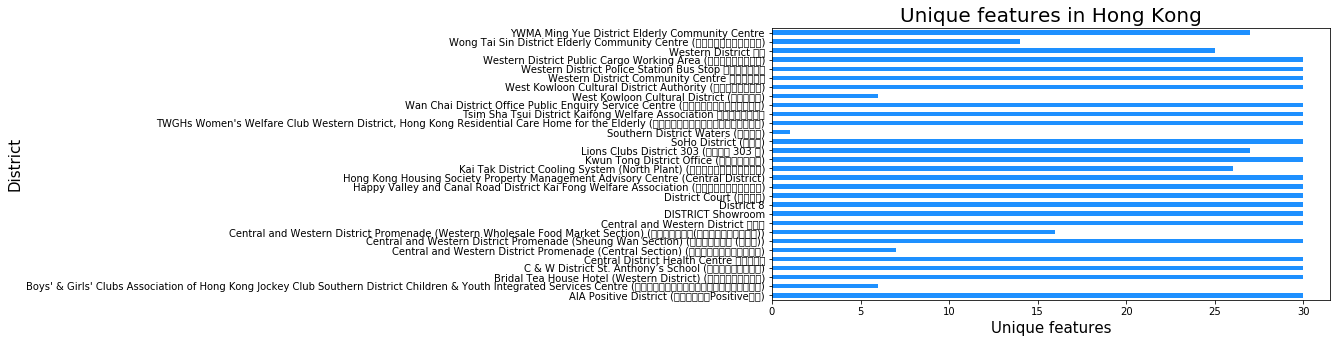

In [169]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline
import seaborn as sns

clr = "dodgerblue"
hk_venues.groupby('name')['Venue Category'].count().plot.barh(figsize=(10,5), color=clr)
plt.title('Unique features in Hong Kong', fontsize = 20)
plt.xlabel('Unique features', fontsize = 15)
plt.ylabel('District',fontsize = 15)
plt.xticks(rotation = 'horizontal')
plt.show()

In [170]:
# one hot encoding
hk_onehot = pd.get_dummies(hk_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
hk_onehot['name'] = ny_venues['name'] 

# move neighborhood column to the first column
fixed_columns = [hk_onehot.columns[-1]] + list(hk_onehot.columns[:-1])
hk_onehot = hk_onehot[fixed_columns]

#examine the new dataframe size after one hot encoding
print('{} rows were returned after one hot encoding.'.format(hk_onehot.shape[0]))

#group rows by neighborhood and by taking the mean of the frequency of occurrence of each category
hk_grouped = hk_onehot.groupby('name').mean().reset_index()

#examine the new dataframe size after one hot encoding
print('{} rows were returned after grouping.'.format(hk_grouped.shape[0]))

755 rows were returned after one hot encoding.
26 rows were returned after grouping.


In [178]:
#print each neighborhood along with the top 5 most common venues
num_top_venues = 6

for hood in hk_grouped['name']:
    print("----"+hood+"----")
    temp2 = hk_grouped[hk_grouped['name'] == hood].T.reset_index()
    temp2.columns = ['venue','freq']
    temp2 = temp2.iloc[1:]
    temp2['freq'] = temp2['freq'].astype(float)
    temp2 = temp2.round({'freq': 2})
    print(temp2.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Brooklyn Community Board 8----
                  venue  freq
0  Fast Food Restaurant  0.14
1           Coffee Shop  0.14
2             Multiplex  0.07
3      Toy / Game Store  0.07
4     Convenience Store  0.07
5          Concert Hall  0.07


----Community Board 1----
                 venue  freq
0  Japanese Restaurant  0.13
1          Yoga Studio  0.07
2          Coffee Shop  0.07
3            BBQ Joint  0.07
4                Hotel  0.03
5    French Restaurant  0.03


----Community Board 1 - Staten Island----
                  venue  freq
0          Dessert Shop  0.22
1          Noodle House  0.22
2  Fast Food Restaurant  0.22
3        Cha Chaan Teng  0.11
4          Tram Station  0.11
5   Dumpling Restaurant  0.11


----Community Board 10----
                  venue  freq
0    Chinese Restaurant  0.17
1  Fast Food Restaurant  0.10
2           Coffee Shop  0.07
3            Restaurant  0.07
4         Grocery Store  0.03
5     French Restaurant  0.03


----Community Board 11----
  

In [173]:
#put into a pandas dataframe

#write a function to sort the venues in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

#create the new dataframe and display the top 10 venues for each neighborhood
num_top_venues = 8

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['name']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
hk_areas_venues_sorted = pd.DataFrame(columns=columns)
hk_areas_venues_sorted['name'] = hk_grouped['name']

for ind in np.arange(hk_grouped.shape[0]):
    hk_areas_venues_sorted.iloc[ind, 1:] = return_most_common_venues(ny_grouped.iloc[ind, :], num_top_venues)

hk_areas_venues_sorted.head()

,name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue
0,Brooklyn Community Board 8,Chinese Restaurant,History Museum,Cocktail Bar,Bus Stop,Lounge,Liquor Store,Café,Seafood Restaurant
1,Community Board 1,Coffee Shop,Bar,Butcher,Cocktail Bar,Italian Restaurant,Restaurant,Tea Room,Martial Arts Dojo
2,Community Board 1 - Staten Island,Pizza Place,Mexican Restaurant,Burger Joint,Storage Facility,Grocery Store,Taco Place,Eastern European Restaurant,Bakery
3,Community Board 10,Southern / Soul Food Restaurant,Pizza Place,Cocktail Bar,Arts & Crafts Store,Sushi Restaurant,Yoga Studio,Sporting Goods Shop,Spanish Restaurant
4,Community Board 11,Donut Shop,Pizza Place,Fast Food Restaurant,Italian Restaurant,Coffee Shop,Bagel Shop,Park,Middle Eastern Restaurant


# RESULTS AND DISCUSSION

Based on dataframe analysis above, New York city has 5 major boroughs and 59 neighbourhoods, while Hong Kong has 3 distrixts and 59 neighbourhoods.

New York has 194nunique features, with boroughs 3, 5 and 7 having the highest features. While for Hong Kong, tere are 149 uniques features which are equally distributed to all the districts. Each district has approximately 30 features, except for few ones with just about 5 features.

For tourism purpose, I will recommend visiting New York city, especially districts 3, 5 and 7 which has very high features. 

In all the districts of New York, restaurants, spa, gyms and coffee shops are common. We can see that these top the list for the most common venue. But for district 1 and 4, these categories are not the top list. So for a businessman, wanting to establish a restaurant, I would recommend New York districts 1 or 4.

## CONCLUSION

In this project, I have been able to compare the cities of New York and Hong Kong, extract their unique features and recommend a city to visit for tourist purposes. I have also been able to recommend a suitable location to establish a restaurant business should anyone be interested to do so.

All these are possible with the help of API and machine learning algorithms for segmentation and clustering.